In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
clade34 = pd.read_csv('../data/2.3.4.4fAreaDTA_MJs_bi.txt')
clade34['dateinyear'] = clade34['date'] - np.floor(clade34['date'])
clade34['od'] = clade34['origin'] + '-' + clade34['destination']
clade34['days'] = clade34['dateinyear']*365

conditions = [
    (clade34['days'] < 32),
    (clade34['days'] >= 32) & (clade34['days'] < 60),
    (clade34['days'] >= 60) & (clade34['days'] < 91),
    (clade34['days'] >= 91) & (clade34['days'] < 121),
    (clade34['days'] >= 121) & (clade34['days'] < 152),
    (clade34['days'] >= 152) & (clade34['days'] < 182),
    (clade34['days'] >= 182) & (clade34['days'] < 213),
    (clade34['days'] >= 213) & (clade34['days'] < 244),
    (clade34['days'] >= 244) & (clade34['days'] < 274),
    (clade34['days'] >= 274) & (clade34['days'] < 305),
    (clade34['days'] >= 305) & (clade34['days'] < 335),
    (clade34['days'] >= 335) & (clade34['days'] < 366),
]

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
clade34['month'] = np.select(conditions, months)

print(clade34)

         Unnamed: 0    height  origin destination  treeNumber         date  \
0                 0  8.353459  NChina      SChina        9001  2009.671198   
1                 1  4.198916  SChina      NChina        9001  2013.825741   
2                 2  3.888807  SChina      NChina        9001  2014.135850   
3                 3  3.754638  SChina      NChina        9001  2014.270019   
4                 4  3.385736     SEA      SChina        9001  2014.638921   
...             ...       ...     ...         ...         ...          ...   
5915480          75  3.749408  SChina      NChina       90000  2014.275249   
5915481          76  2.810167  SChina         SEA       90000  2015.214491   
5915482          77  7.777146  NChina      SChina       90000  2010.247512   
5915483          78  7.495140  SChina         SEA       90000  2010.529518   
5915484          79  5.746412     SEA      SChina       90000  2012.278245   

         dateinyear             od        days month  
0       

In [3]:
od_month_migtimes = clade34.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes['month'] = pd.Categorical(od_month_migtimes['month'],months)
od_month_migtimes = od_month_migtimes.sort_values("month").sort_values(['od','month']).reset_index()
print(od_month_migtimes)

     index                od month  Unnamed: 0
0        4         Africa-CA   Mar           2
1        0         Africa-CA   Apr           1
2        5         Africa-CA   May           4
3        3         Africa-CA   Jun           8
4        2         Africa-CA   Jul          16
..     ...               ...   ...         ...
950    949  USAandCanada-SEA   Jul           3
951    947  USAandCanada-SEA   Aug          10
952    954  USAandCanada-SEA   Sep          25
953    953  USAandCanada-SEA   Oct          46
954    952  USAandCanada-SEA   Nov           4

[955 rows x 4 columns]


In [4]:
clade34_bf3 = clade34.loc[clade34['od'].isin(['Europe-Africa','Europe-CA','Europe-JapanKorea','Europe-Qinghai','Europe-Russia','JapanKorea-Europe','JapanKorea-SChina','JapanKorea-USAandCanada','NChina-Europe','NChina-JapanKorea','NChina-Qinghai','NChina-SChina','Qinghai-Europe','Russia-Africa','Russia-Europe','SChina-JapanKorea','SChina-NChina','SChina-SEA','SEA-SChina','USAandCanada-JapanKorea'])]

In [20]:
od_month_migtimes_bf3 = clade34_bf3.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes_bf3['month'] = pd.Categorical(od_month_migtimes_bf3['month'],months)
od_month_migtimes_bf3 = od_month_migtimes_bf3.sort_values("month").sort_values(['od','month']).reset_index()
od_month_migtimes_bf3 = od_month_migtimes_bf3.rename(columns={'Unnamed: 0': 'counts'})
od_month_migtimes_bf3.to_csv('../data/virus_od_month_migtimes_bf3.csv')
print(od_month_migtimes_bf3)

     index                       od month  counts
0        4            Europe-Africa   Jan      53
1        3            Europe-Africa   Feb      34
2        7            Europe-Africa   Mar       5
3        0            Europe-Africa   Apr       7
4        8            Europe-Africa   May      22
..     ...                      ...   ...     ...
235    229  USAandCanada-JapanKorea   Aug    1990
236    239  USAandCanada-JapanKorea   Sep    9574
237    238  USAandCanada-JapanKorea   Oct   23900
238    237  USAandCanada-JapanKorea   Nov   13632
239    230  USAandCanada-JapanKorea   Dec      29

[240 rows x 4 columns]


In [5]:
NS_order34 = ['SChina-JapanKorea','SChina-NChina','Qinghai-Europe','NChina-Europe','JapanKorea-Europe','SEA-SChina','Europe-Russia','JapanKorea-USAandCanada','NChina-JapanKorea','NChina-Qinghai','USAandCanada-JapanKorea','Russia-Europe','SChina-SEA','Europe-JapanKorea','Europe-Qinghai','NChina-SChina','JapanKorea-SChina','Europe-CA','Europe-Africa','Russia-Africa']

In [6]:
clade34_bf3.loc[:,'days']=clade34_bf3.loc[:,'dateinyear']*365
clade34_bf3['od'] = pd.Categorical(clade34_bf3['od'], NS_order34)
clade34_bf3 = clade34_bf3.sort_values("od")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-6-6a42613f1dc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clade34_bf3['od'] = pd.Categorical(clade34_bf3['od'], NS_order34)


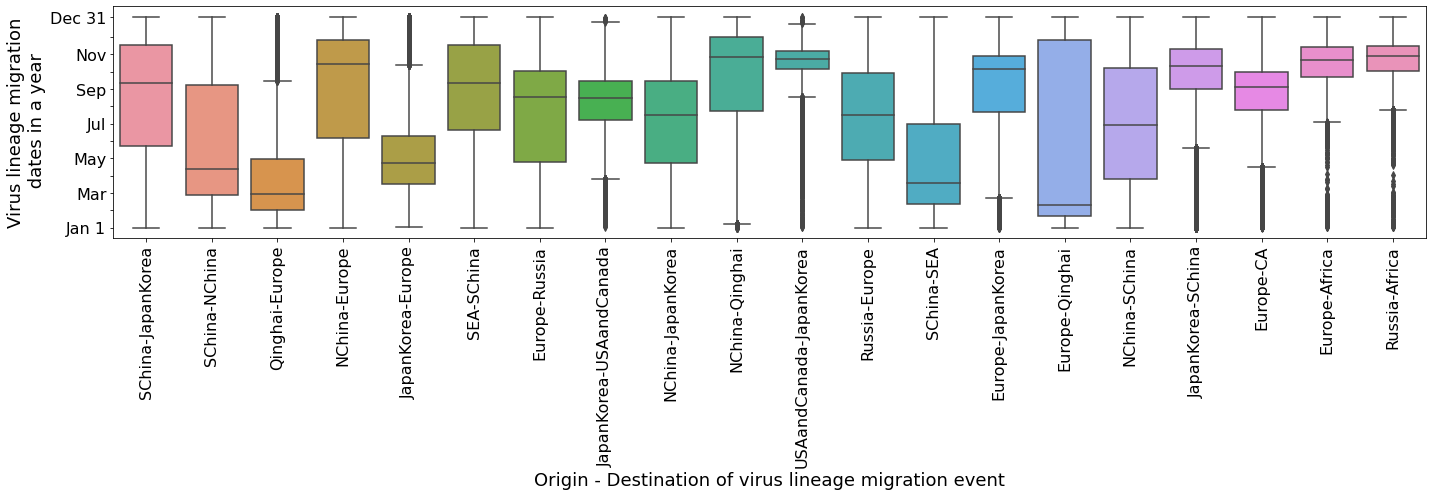

In [23]:
fig = plt.figure(figsize=(20, 7))
plt.xticks(rotation=90,fontsize=16)

plt.yticks(ticks=[0,30,60,90,120,150,180,210,240,270,300,330,365],labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','','Dec 31'],fontsize=16)
bwp_34 = sns.boxplot(
    x="od", 
    y="days", 
    data=clade34_bf3, whis=())
plt.xlabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.ylabel('Virus lineage migration\n dates in a year',fontsize=18)
plt.tight_layout()
fig.savefig('../output/clade2.3.4.4_jumps_bf3.svg')

In [11]:
c34_dis = clade34_bf3.groupby(['od'])['days'].describe(percentiles=[.025, .25, .5, .75, .975])
c34_dis.to_csv('../data/2.3.4.4_mj_dis.csv')
c34_dis

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
od,,,,,,,,,,
SChina-JapanKorea,519318.0,223.462361,102.677837,0.001610,17.656216,140.653932,250.084012,317.144759,347.372840,364.999518
SChina-NChina,1008053.0,146.066087,112.395807,0.000154,7.263359,56.879010,101.628604,247.749419,357.474204,364.999835
Qinghai-Europe,33103.0,114.323055,125.184257,0.000788,3.301386,29.945899,58.097012,119.467993,361.320329,364.994097
NChina-Europe,43808.0,233.989139,116.983505,0.010472,5.552116,155.136731,283.233121,325.705574,360.033593,364.995799
JapanKorea-Europe,84270.0,124.009248,67.363168,0.043004,31.860084,75.166716,112.357938,157.807223,326.707481,364.950474
SEA-SChina,712621.0,231.025732,97.736555,0.000185,16.360999,169.390429,250.856184,315.890814,352.628431,364.999905
Europe-Russia,832287.0,196.999742,110.272210,0.000011,2.588129,113.503072,225.416307,270.849005,361.643816,364.999951
JapanKorea-USAandCanada,99704.0,217.527277,49.155986,0.983758,106.371535,186.159523,224.063327,254.127036,295.572275,363.467257
NChina-JapanKorea,35779.0,186.513021,95.059176,0.001427,12.163168,112.552719,194.343542,254.603779,353.228254,364.984866


### Disribution of earliest virus lineage migration event in a year

In [9]:
clade34_mindatInYr_bf3 = clade34_bf3.groupby(['treeNumber','od'])['dateinyear'].min().reset_index()
clade34_mindatInYr_bf3['days']=clade34_mindatInYr_bf3['dateinyear']*365
clade34_mindatInYr_bf3 = clade34_mindatInYr_bf3.sort_values('od')

In [10]:
clade34_mindatInYr_bf3['od'] = pd.Categorical(clade34_mindatInYr_bf3['od'], NS_order34)
clade34_mindatInYr_bf3 = clade34_mindatInYr_bf3.sort_values("od")

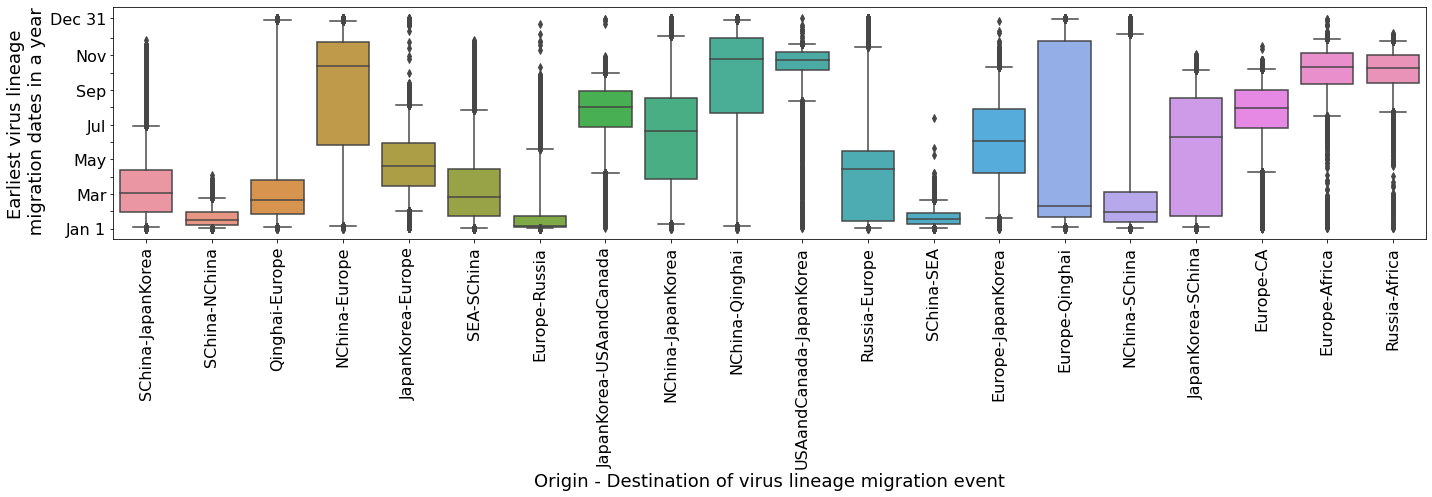

In [18]:
fig34 = plt.figure(figsize=(20, 7))
plt.xticks(rotation=90,fontsize=16)
plt.yticks(ticks=[0,30,60,90,120,150,180,210,240,270,300,330,365],
           labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','','Dec 31'],
           fontsize=16)
bwp_34 = sns.boxplot(
    x="od", 
    y="days", 
    data=clade34_mindatInYr_bf3, 
    whis=[2.5,97.5])
plt.xlabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.ylabel('Earliest virus lineage\n migration dates in a year',fontsize=18)
plt.tight_layout()
fig34.savefig('../output/clade2.3.4.4_earliest_jumps_bf3.svg')

In [12]:
c34_minDIY_dis = clade34_mindatInYr_bf3.groupby(['od'])['days'].describe(percentiles=[.025, .25, .5, .75, .975])
c34_minDIY_dis.to_csv('../data/2.3.4.4_mj_minDateInYear_dis.csv')
c34_minDIY_dis

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
od,,,,,,,,,,
SChina-JapanKorea,80970.0,69.147227,48.282239,0.001610,2.697073,29.427160,61.894074,101.455297,177.063596,326.615602
SChina-NChina,81000.0,19.071111,15.079448,0.000154,0.579107,6.573938,15.427703,28.837859,53.145576,93.169771
Qinghai-Europe,25546.0,102.846877,123.564310,0.000788,2.614027,24.743209,48.976463,84.932070,360.627470,364.989460
NChina-Europe,37260.0,230.601551,119.095220,0.010472,4.775998,144.256502,281.417237,324.042527,359.577035,364.995799
JapanKorea-Europe,77027.0,112.313881,49.815490,0.043004,30.357325,72.836845,107.565513,147.913333,213.763933,364.772024
SEA-SChina,81000.0,69.318474,58.308943,0.000185,1.700085,21.875852,54.493583,102.371478,206.143914,326.374909
Europe-Russia,80996.0,19.889895,37.642784,0.000011,0.292747,2.657303,4.902833,21.930121,137.142628,353.697069
JapanKorea-USAandCanada,77918.0,204.203845,44.978006,0.983758,97.093331,176.669753,210.693017,239.024669,269.054277,363.467257
NChina-JapanKorea,24993.0,159.457783,87.011612,0.001427,8.629416,86.516185,168.794064,226.389250,332.922245,364.976274


### Virus lineage migration distributover months

In [11]:
from scipy import stats

In [ ]:
fig2, axes2 = plt.subplots(10,9,figsize=(80,80),dpi=100,sharex=True, sharey=True)

for i, (ax, od) in enumerate(zip(axes2.flatten(), clade34.od.unique())):
    x = clade34.loc[clade34.od==od, 'dateinyear']
    
    res = stats.relfreq(x, numbins=12)
    x_space = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
                                 res.frequency.size)
    ax.bar(x_space,res.frequency,width=res.binsize)
    #ax.hist(x, alpha=0.5, bins=365, density=True, stacked=True, label=od)
    ax.set_title(od)
    ax.set_xlim([x_space.min(), x_space.max()])
    
plt.suptitle('Probability Histogram of date of Markov jump events', y=1.05, size=16)
#ax.set_xlim(0, 1); ax.set_ylim(0, 10);
fig2.savefig('WAI_data/MJ_Dis_Clade2.3.4.4_monthly2.pdf')   # save the figure to file
plt.close(fig2)    # close the figure window

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(25,10),dpi=100,sharex=True, sharey=True)

for i, (ax, origin) in enumerate(zip(axes.flatten(), clade34.origin.unique())):
    x = clade34.loc[clade34.origin==origin, 'dateinyear']
    
    #res = stats.relfreq(x, numbins=12)
    #x_space = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
    #                             res.frequency.size)
    #ax.bar(x_space,res.frequency,width=res.binsize)
    ax.hist(x, alpha=0.5, bins=12, density=True, stacked=True, label=origin, edgecolor='black')
    ax.set_title('Markov jump from ' + origin)
    ax.set_ylabel('Frequency density')
    ax.set_xticks([1/12,1/6,1/4,1/3,5/12,1/2,7/12,2/3,3/4,5/6,11/12,1])
    ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
    #ax.set_xlim([x_space.min(), x_space.max()])
    #ax.set_xlim(0,1)
    
#plt.suptitle('Probability Histogram of date of Markov jump events', y=1.05, size=16)
ax.set_xlim(0, 1); 
plt.tight_layout();
fig.savefig('WAI_data/MJ_Dis_Clade2.3.4.4_monthly_origin_density.pdf')   # save the figure to file
plt.close(fig)    # close the figure window

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(25,10),dpi=100,sharex=True, sharey=True)

for i, (ax, destination) in enumerate(zip(axes.flatten(), clade34.destination.unique())):
    x = clade34.loc[clade34.destination==destination, 'dateinyear']
    
    #res = stats.relfreq(x, numbins=12)
    #x_space = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
    #                             res.frequency.size)
    #ax.bar(x_space,res.frequency,width=res.binsize)
    ax.hist(x, alpha=0.5, bins=12, density=True, stacked=True, label=destination, edgecolor='black')
    ax.set_title('Markov jump to ' + destination)
    ax.set_ylabel('Frequency density')
    ax.set_xticks([1/12,1/6,1/4,1/3,5/12,1/2,7/12,2/3,3/4,5/6,11/12,1])
    ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
    #ax.set_xlim([x_space.min(), x_space.max()])
    #ax.set_xlim(0,1)
    
#lt.suptitle('Probability Histogram of date of Markov jump events', y=1.05, size=16)
ax.set_xlim(0, 1); 
plt.tight_layout();
fig.savefig('WAI_data/MJ_Dis_Clade2.3.4.4_monthly_destination_density.pdf')   # save the figure to file
plt.close(fig)    # close the figure window

In [17]:
freq_clade34_dest = pd.DataFrame(columns=['dest_location','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i, (destination) in enumerate(clade34.destination.unique()):
    x=clade34.loc[clade34.destination==destination,'dateinyear']
    res=stats.relfreq(x,numbins=12)
    freql = res.frequency.tolist()
    freq_clade34_dest.loc[i] = [destination] + freql

freq_clade34_dest

,dest_location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,SChina,0.037559,0.059884,0.052550,0.048500,0.054041,0.066125,0.084251,0.097986,0.130173,0.163269,0.159580,0.046083
1,NChina,0.057700,0.147309,0.185064,0.164581,0.087986,0.038499,0.033817,0.036010,0.042871,0.058834,0.095280,0.052049
2,SEA,0.078040,0.240348,0.210819,0.109502,0.060401,0.053703,0.051947,0.013622,0.019237,0.036651,0.069097,0.056633
3,Russia,0.092066,0.094795,0.016623,0.057440,0.075039,0.024957,0.087305,0.186250,0.133843,0.074857,0.082697,0.074129
4,JapanKorea,0.017800,0.040231,0.048662,0.056376,0.062646,0.068979,0.074907,0.071278,0.134011,0.224452,0.183433,0.017225
5,Africa,0.000356,0.000688,0.000356,0.000197,0.000454,0.003887,0.028537,0.102153,0.216440,0.401126,0.245486,0.000319
6,Qinghai,0.145625,0.267110,0.068779,0.002838,0.003930,0.007873,0.015066,0.027136,0.052403,0.102610,0.174968,0.131663
7,CA,0.001972,0.004256,0.003914,0.011687,0.041715,0.095276,0.155217,0.234416,0.338527,0.109387,0.001844,0.001789
8,Europe,0.062717,0.095900,0.139248,0.124414,0.114363,0.083453,0.063259,0.052452,0.058450,0.074982,0.082314,0.048449
9,USAandCanada,0.000437,0.003395,0.010506,0.018509,0.058564,0.141991,0.208907,0.264619,0.225040,0.065063,0.002551,0.000417


In [12]:
freq_clade34 = pd.DataFrame(columns=['origin_location','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i, (origin) in enumerate(clade34.origin.unique()):
    x=clade34.loc[clade34.origin==origin,'dateinyear']
    res=stats.relfreq(x,numbins=12)
    freql = res.frequency.tolist()
    freq_clade34.loc[i] = [origin] + freql

freq_clade34

,origin_location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,NChina,0.055477,0.096498,0.084749,0.079419,0.078921,0.080789,0.081357,0.084715,0.085823,0.097170,0.116659,0.058422
1,SChina,0.056230,0.154667,0.163679,0.123851,0.075763,0.053001,0.051285,0.035678,0.044617,0.073699,0.120667,0.046863
2,SEA,0.025355,0.042881,0.048548,0.040868,0.051631,0.072582,0.104131,0.108158,0.103392,0.148261,0.209475,0.044718
3,Europe,0.067186,0.076702,0.019730,0.047912,0.064008,0.037342,0.087239,0.166723,0.170434,0.130849,0.078418,0.053458
4,JapanKorea,0.027771,0.036451,0.037850,0.038639,0.043871,0.060337,0.079665,0.114513,0.201855,0.214549,0.114719,0.029780
5,Russia,0.031243,0.025051,0.010086,0.022112,0.037030,0.034261,0.056369,0.114147,0.199173,0.286860,0.168287,0.015380
6,USAandCanada,0.000709,0.001560,0.004255,0.007216,0.009946,0.011630,0.022215,0.055652,0.281647,0.514591,0.090135,0.000443
7,Qinghai,0.128262,0.287939,0.235532,0.081536,0.022195,0.008955,0.006716,0.005633,0.006379,0.021907,0.095306,0.099639
8,CA,0.048435,0.099232,0.047253,0.018311,0.020969,0.019787,0.037212,0.088009,0.183107,0.264619,0.142942,0.030124
9,Africa,0.050350,0.088112,0.048252,0.019580,0.030769,0.030769,0.044755,0.077622,0.179720,0.253846,0.147552,0.028671


In [13]:
birdProb34 = pd.read_csv('../data/2.3.4.4_bird.csv')
birdProb34.head()

,Location,lat,lon,lon_indx,lat_indx,Pelecaniformes1,Pelecaniformes2,Pelecaniformes3,Pelecaniformes4,Pelecaniformes5,...,Procellariiformes3,Procellariiformes4,Procellariiformes5,Procellariiformes6,Procellariiformes7,Procellariiformes8,Procellariiformes9,Procellariiformes10,Procellariiformes11,Procellariiformes12
0,Africa,8.026693,-7.546616,20694,9837,0.011,0.015,0.025,0.017,0.008,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,CA,25.520260,83.473704,31617,7738,0.031,0.025,0.037,0.025,0.024,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,Europe,49.512838,11.784004,23014,4858,0.022,0.021,0.022,0.046,0.067,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,JapanKorea,38.389548,140.234209,38428,6193,0.065,0.076,0.065,0.116,0.087,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,NChina,38.273597,111.853957,35022,6207,0.002,0.002,0.002,0.004,0.002,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [15]:
corr_mj_bird_34_orig = pd.DataFrame(columns=['origin_location','bird_order','correlation_coefficient','p_value'])
i=0
for location in birdProb34.Location.unique():
    mj = freq_clade34.loc[freq_clade34.origin_location==location,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
    for bird in ['Accipitriformes','Anseriformes','Charadriiformes','Ciconiiformes','Falconiformes',
                 'Gruiformes','Passeriformes','Pelecaniformes','Suliformes']:
        birdProb = birdProb34.loc[birdProb34.Location==location,[bird+'1',bird+'2',bird+'3',bird+'4',bird+'5',
                                                                 bird+'6',bird+'7',bird+'8',bird+'9',bird+'10',bird+'11',bird+'12']]
        
        cor,p = stats.pearsonr(mj.values[0],birdProb.values[0])
        corr_mj_bird_34_orig.loc[i]= [location] + [bird] + [cor] + [p]
        
        i=i+1
        
corr_mj_bird_34_orig

,origin_location,bird_order,correlation_coefficient,p_value
0,Africa,Accipitriformes,-0.501221,0.096907
1,Africa,Anseriformes,0.122209,0.705159
2,Africa,Charadriiformes,0.410120,0.185456
3,Africa,Ciconiiformes,-0.253601,0.426416
4,Africa,Falconiformes,-0.181654,0.572054
...,...,...,...,...
85,USAandCanada,Falconiformes,-0.016856,0.958533
86,USAandCanada,Gruiformes,-0.271697,0.392961
87,USAandCanada,Passeriformes,0.491111,0.104941
88,USAandCanada,Pelecaniformes,-0.009424,0.976810


In [ ]:
import statsmodels.api as sm

corr_mj_bird_34_orig = pd.DataFrame(columns=['origin_location','bird_order','correlation_coefficient','p_value'])
i=0
for location in birdProb34.Location.unique():
    mj = freq_clade34.loc[freq_clade34.origin_location==location,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
    for bird in ['Accipitriformes','Anseriformes','Charadriiformes','Ciconiiformes','Falconiformes',
                 'Gruiformes','Passeriformes','Pelecaniformes','Suliformes']:
        birdProb = birdProb34.loc[birdProb34.Location==location,[bird+'1',bird+'2',bird+'3',bird+'4',bird+'5',
                                                                 bird+'6',bird+'7',bird+'8',bird+'9',bird+'10',bird+'11',bird+'12']]
        
        cor = sm.tsa.stattools.ccf(mj.values[0],birdProb.values[0], adjusted=False)
        corr_mj_bird_34_orig.loc[i]= [location] + [bird] + [cor]
        
        i=i+1
        
corr_mj_bird_34_orig

In [18]:
corr_mj_bird_34_dest = pd.DataFrame(columns=['dest_location','bird_order','correlation_coefficient','p_value'])
i=0
for location in birdProb34.Location.unique():
    mj = freq_clade34_dest.loc[freq_clade34_dest.dest_location==location,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
    for bird in ['Accipitriformes','Anseriformes','Charadriiformes','Ciconiiformes','Falconiformes',
                 'Gruiformes','Passeriformes','Pelecaniformes','Suliformes']:
        birdProb = birdProb34.loc[birdProb34.Location==location,[bird+'1',bird+'2',bird+'3',bird+'4',bird+'5',
                                                                 bird+'6',bird+'7',bird+'8',bird+'9',bird+'10',bird+'11',bird+'12']]
        cor,p = stats.pearsonr(mj.values[0],birdProb.values[0])
        corr_mj_bird_34_dest.loc[i]= [location] + [bird] + [cor] + [p]
        i=i+1
        
corr_mj_bird_34_dest

,dest_location,bird_order,correlation_coefficient,p_value
0,Africa,Accipitriformes,-0.631420,0.027655
1,Africa,Anseriformes,0.196169,0.541168
2,Africa,Charadriiformes,0.503617,0.095065
3,Africa,Ciconiiformes,-0.309215,0.328077
4,Africa,Falconiformes,-0.245755,0.441342
...,...,...,...,...
85,USAandCanada,Falconiformes,-0.926079,0.000015
86,USAandCanada,Gruiformes,-0.418267,0.176013
87,USAandCanada,Passeriformes,0.697372,0.011701
88,USAandCanada,Pelecaniformes,0.473562,0.119916


In [19]:
corr_mj_bird_34_dest.to_csv('../data/corr_mj_bird_34_dest.csv')
corr_mj_bird_34_orig.to_csv('../data/corr_mj_bird_34_orig.csv')